# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
df = pd.read_csv('data_clustering.csv')

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,Target
0,-0.970546,1,0,1.419862,0,-0.000315,2
1,0.268963,1,0,1.307715,0,2.218381,0
2,-0.586526,1,2,-1.439874,3,-1.024091,1
3,-0.387294,1,2,-1.047361,3,0.886694,1
4,-0.972736,0,2,-1.047361,3,0.594263,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
# Pisahkan fitur (X) dan target (y)
X = df.drop('Target', axis=1)  # Semua kolom 
y = df['Target']               # Kolom Target

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Print dimensi
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (2011, 6)
Dimensi X_test: (503, 6)
Dimensi y_train: (2011,)
Dimensi y_test: (503,)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [5]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [6]:
# Menyimpan Model
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [7]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.
knn = KNeighborsClassifier().fit(X_train, y_train)  # K-Nearest Neighbors (KNN)
rf = RandomForestClassifier().fit(X_train, y_train)  # Random Forest

==== Decision Tree Classifier ====
Confusion Matrix:
[[153   0   7]
 [  0 126   0]
 [  3   0 214]]
Accuracy: 0.9801
Precision (macro): 0.9830
Recall (macro): 0.9808
F1-Score (macro): 0.9818

----------------------------------------



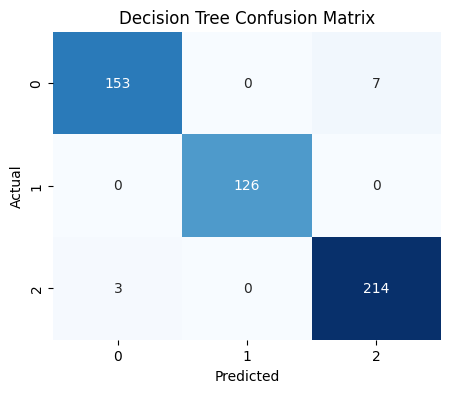

In [8]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
# Evaluasi model Decision Tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== KNN Classifier ====
Confusion Matrix:
[[153   0   7]
 [  0 126   0]
 [  5   0 212]]
Accuracy: 0.9761
Precision: 0.9788
Recall: 0.9777
F1-Score: 0.9782

----------------------------------------



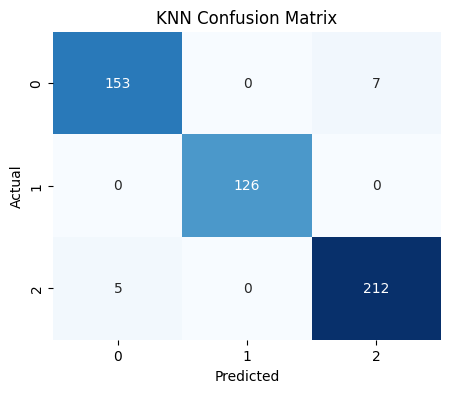

In [9]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[157   0   3]
 [  0 126   0]
 [  0   0 217]]
Accuracy: 0.9940
Precision: 0.9955
Recall: 0.9938
F1-Score: 0.9946

----------------------------------------



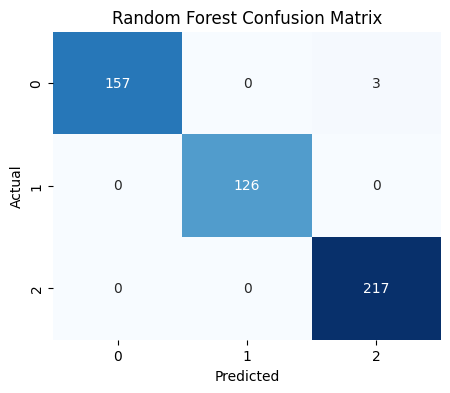

In [10]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
joblib.dump(knn, 'explore_K-Nearest Neighbors (KNN)_classification.h5')
joblib.dump(rf, 'explore_Random Forest_classification.h5')

['explore_Random Forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [12]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Model Performance on Test Set:
Accuracy: 0.9940
Precision: 0.9955
Recall: 0.9938
F1-Score: 0.9946


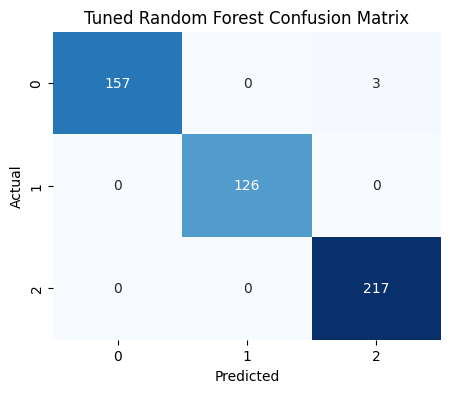

In [13]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
y_pred_tuned = best_rf_bayes.predict(X_test)

# Print evaluation metrics
print("Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned, average='macro'):.4f}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Menyimpan Model hasil tuning
joblib.dump(best_rf_bayes, 'tuning_classification.h5')

['tuning_classification.h5']